In [1]:
import pandas as pd 
import numpy as np
from fredget import fredget

CPIAUCSL
CPILFESL
GASREGW
PCEPI


KeyError: 'CPIAUCSL'

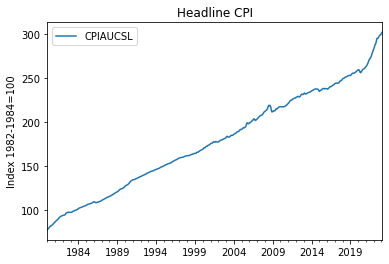

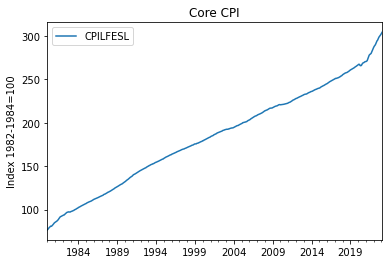

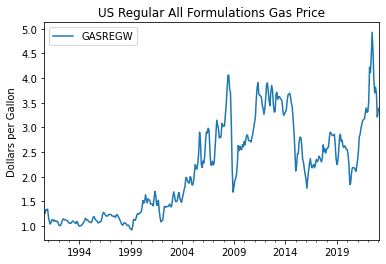

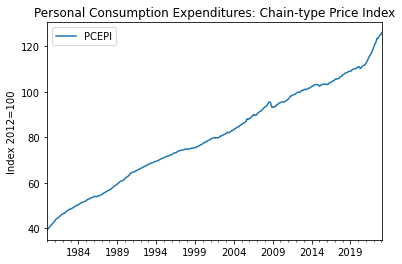

In [6]:
start_d ='1980-01-01'
end_d= '2023-02-03'
fq = "m" 
FRED_list = ['CPIAUCSL','CPILFESL','GASREGW','PCEPI']
Name_remap = {'T10Y2Y': '10-Year Minus 2-Year Treasury', 'CPIAUCSL': 'Headline CPI','CPILFESL': 'Core CPI'}
df_raw,dfinfo = fredget(FRED_list, start_d, end_d, freq = fq, plots=True, name_map = Name_remap)



In [8]:
df = df_raw.pct_change(12)

<AxesSubplot:>

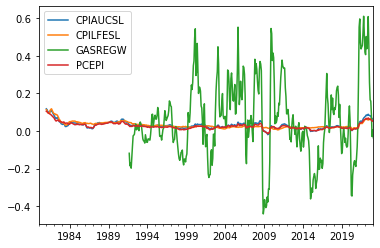

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True, linewidth=120)
df.plot()

In [10]:
endog = df.loc['1992-01-01':]

# Create the model
mod = sm.tsa.DynamicFactor(endog, k_factors=1, factor_order=2, error_order=2)
initial_res = mod.fit(method='powell', disp=False)
res = mod.fit(initial_res.params, disp=False)

/Users/wcrossb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


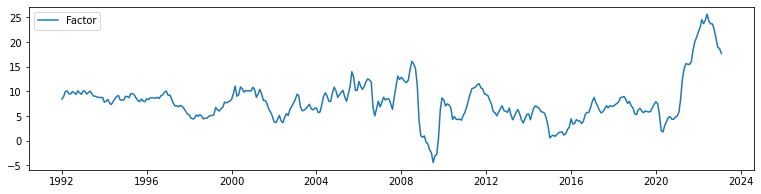

In [11]:
fig, ax = plt.subplots(figsize=(13,3))

# Plot the factor
dates = endog.index._mpl_repr()
ax.plot(dates, res.factors.filtered[0], label='Factor')
ax.legend()
